In [1]:
import tushare as ts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Part 1 - data

In [ ]:
df = ts.get_hist_data('300370') 
training_set = df['close']
training_set=pd.DataFrame(training_set)
sc = MinMaxScaler(feature_range = (0, 1))
# training_set_scaled = sc.fit_transform(training_set)
training_set_scaled = np.array(training_set)
x= []
y = []
for i in range(10, 611):
    x.append(training_set_scaled[i-10:i, 0])
    y.append(training_set_scaled[i, 0])
xtrain, xtest, ytrain, ytest = train_test_split(
    x, y, test_size=0.2, random_state=0)
xtrain, xtest, ytrain, ytest = np.array(xtrain),np.array(xtest),np.array(ytrain),np.array(ytest)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], 1))
xtest = np.reshape(xtest, (xtest.shape[0], xtest.shape[1], 1))
xtrain.shape

# Part 2 - Building the RNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 30, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 30, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 30, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 30))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(xtrain, ytrain, epochs = 100, batch_size = 20)

Epoch 1/100
480/480 [==============================] - 7s 15ms/step - loss: 23.8099
Epoch 2/100
480/480 [==============================] - 1s 2ms/step - loss: 7.6836
Epoch 3/100
480/480 [==============================] - 1s 2ms/step - loss: 5.7530
Epoch 4/100
480/480 [==============================] - 1s 2ms/step - loss: 5.6541
Epoch 5/100
480/480 [==============================] - 1s 2ms/step - loss: 5.6626
Epoch 6/100
480/480 [==============================] - 1s 2ms/step - loss: 5.3788
Epoch 7/100
480/480 [==============================] - 1s 2ms/step - loss: 3.1252
Epoch 8/100
480/480 [==============================] - 1s 2ms/step - loss: 1.2287
Epoch 9/100
480/480 [==============================] - 1s 2ms/step - loss: 0.8931
Epoch 10/100
480/480 [==============================] - 1s 2ms/step - loss: 0.7781
Epoch 11/100
480/480 [==============================] - 1s 2ms/step - loss: 0.7668
Epoch 12/100
480/480 [==============================] - 1s 2ms/step - loss: 0.8155
Epoch 13/10

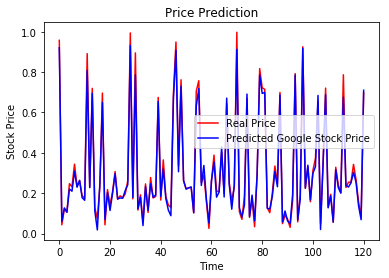

In [88]:
predicted_stock_price = regressor.predict(xtest)
# predicted_stock_price = sc.inverse_transform(predicted_stock_price)
plt.plot(ytest, color = 'red', label = 'Real Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [89]:
np.sqrt(mean_squared_error(predicted_stock_price.astype(int), ytest.astype(int)))

0.0